# Getting the Dependencies

In [1]:
#!pip install numpy pandas scikit-learn matplotlib

In [2]:
#!pip install seaborn

## Importing the Dependencies

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
train_data = pd.read_csv('Houses Price Dataset/train.csv')
test_data = pd.read_csv('Houses Price Dataset/test.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
# Removal of Missing Values
# For numerical features
numerical_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
train_data[numerical_features] = train_data[numerical_features].fillna(train_data[numerical_features].mean())

# For categorical features
categorical_features = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                         'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
                         'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
train_data[categorical_features] = train_data[categorical_features].fillna(train_data[categorical_features].mode().iloc[0])

In [9]:
# Filling the 'Alley' Column with the String 'None'
train_data['Alley'].fillna('None', inplace=True)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [12]:
important_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'SalePrice']
important_data = train_data[important_columns]

# Data Visualization

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


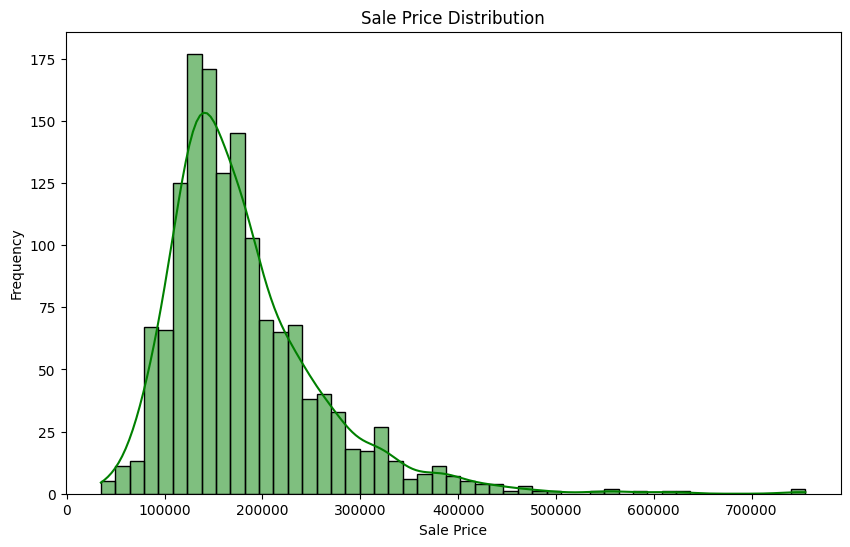

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, color = 'green')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


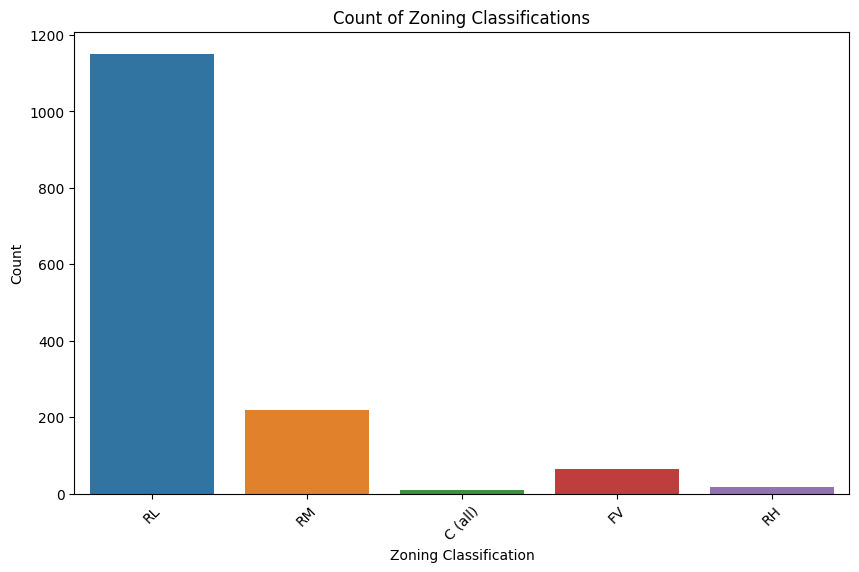

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='MSZoning')
plt.title('Count of Zoning Classifications')
plt.xlabel('Zoning Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


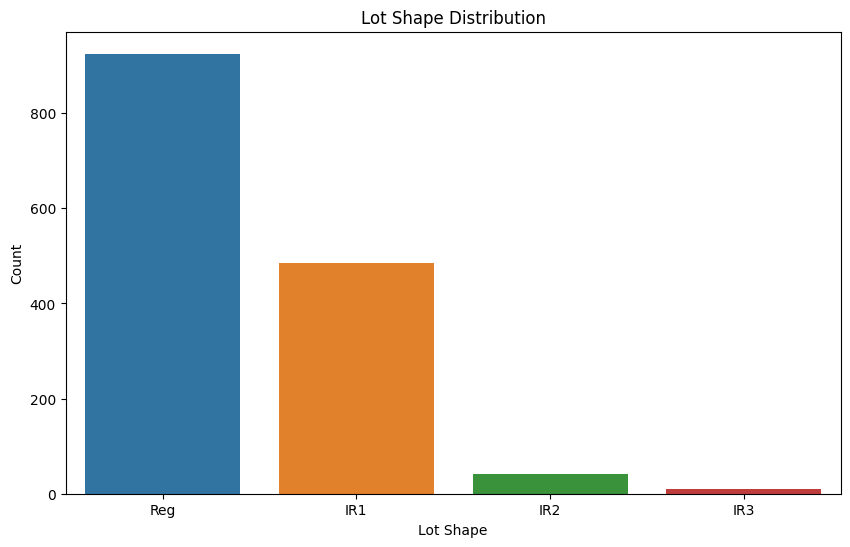

In [15]:
#  Lot Shape Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='LotShape')
plt.title('Lot Shape Distribution')
plt.xlabel('Lot Shape')
plt.ylabel('Count')
plt.show()

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


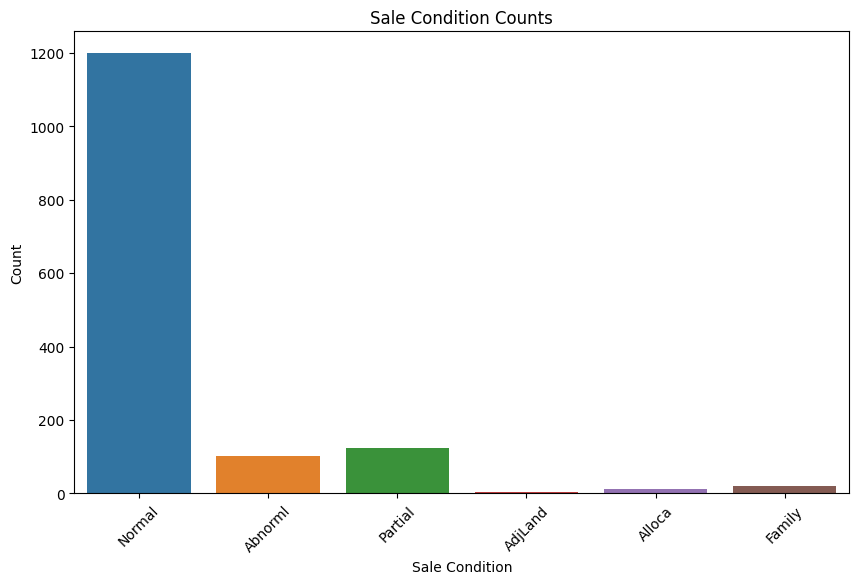

In [16]:
#  Sale Condition Counts
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='SaleCondition')
plt.title('Sale Condition Counts')
plt.xlabel('Sale Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


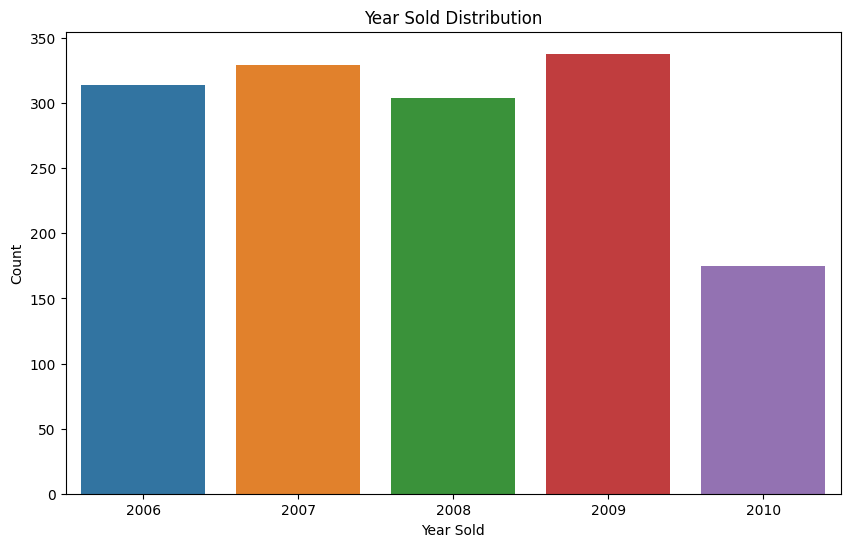

In [17]:
# Year Sold Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='YrSold')
plt.title('Year Sold Distribution')
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.show()

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


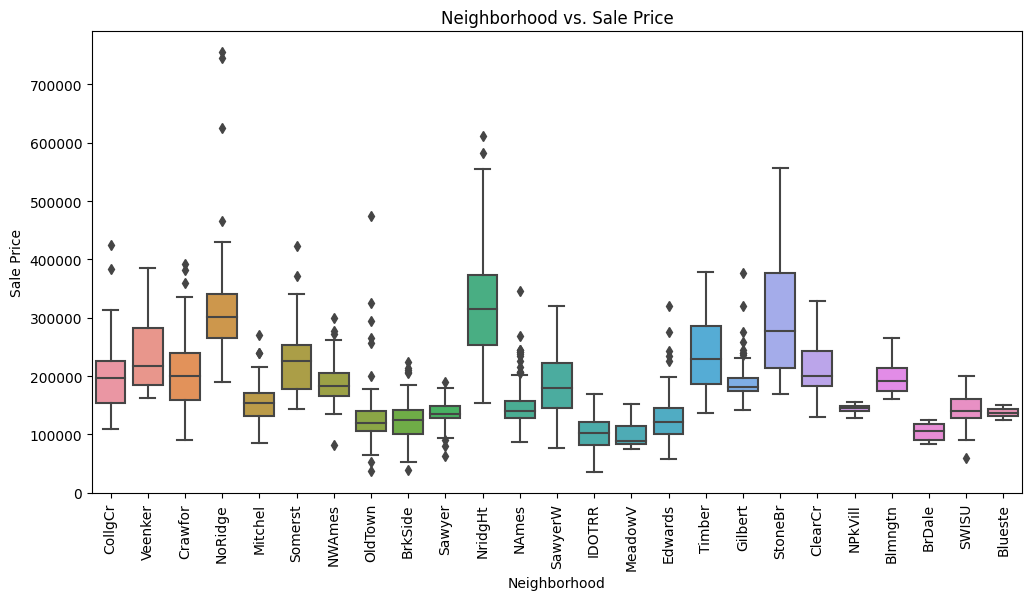

In [18]:
# Neighborhood vs. Sale Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.title('Neighborhood vs. Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()


C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

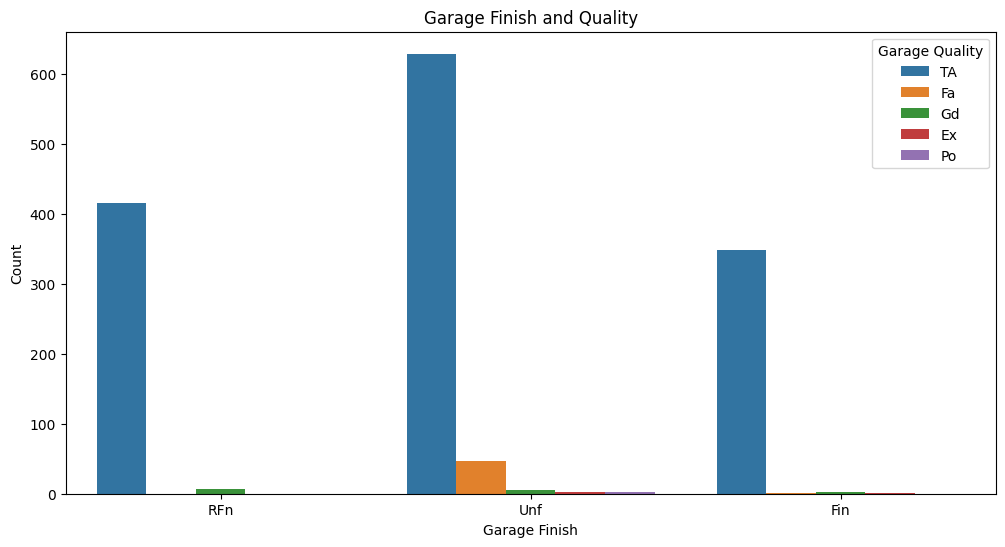

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='GarageFinish', hue='GarageQual')
plt.title('Garage Finish and Quality')
plt.xlabel('Garage Finish')
plt.ylabel('Count')
plt.legend(title='Garage Quality', loc='upper right')
plt.show()

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


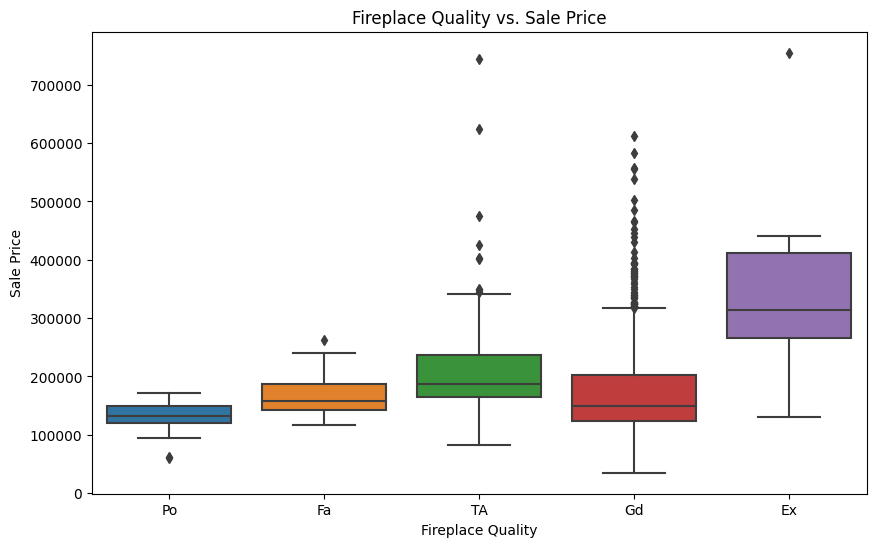

In [20]:
#  Fireplace Quality vs. Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=train_data, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title('Fireplace Quality vs. Sale Price')
plt.xlabel('Fireplace Quality')
plt.ylabel('Sale Price')
plt.show()

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


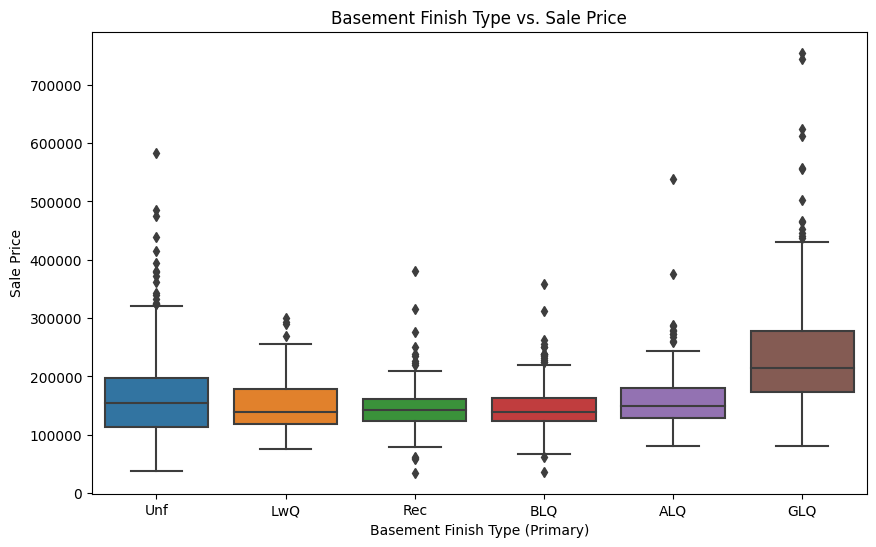

In [21]:
#  Basement Finish Type vs. Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=train_data, order=['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
plt.title('Basement Finish Type vs. Sale Price')
plt.xlabel('Basement Finish Type (Primary)')
plt.ylabel('Sale Price')
plt.show()

C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Prodigy_ML_01\housepriceprediction\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


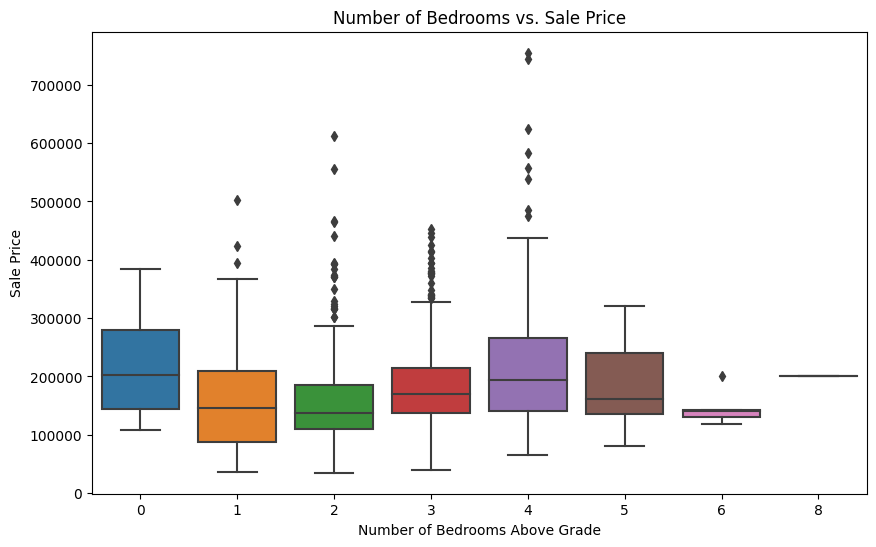

In [22]:
# Number of Bedrooms vs. Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=train_data)
plt.title('Number of Bedrooms vs. Sale Price')
plt.xlabel('Number of Bedrooms Above Grade')
plt.ylabel('Sale Price')
plt.show()

# Model Selection

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

In [24]:
# Handle missing values
train_data.dropna(subset=['SalePrice'], inplace=True)  # Drop rows with missing target (SalePrice)
train_data.fillna(0, inplace=True)  # Fill remaining missing values with 0

In [25]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


## Feature selection

In [26]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = train_data[features]
y = train_data['SalePrice']

## Feature scaling

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Training

### 1. Linear Regression

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [30]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Squared Error (MSE) for Linear Regressor: {mse:.2f}")
print(f"Mean Absolute Error (MAE) for Linear Regressor: {mae:.2f}")
print(f"R-squared (R2) for Linear Regressor: {r2:.2f}")

Mean Squared Error (MSE) for Linear Regressor: 1576962754.88
Mean Absolute Error (MAE) for Linear Regressor: 25319.86
R-squared (R2) for Linear Regressor: 0.79


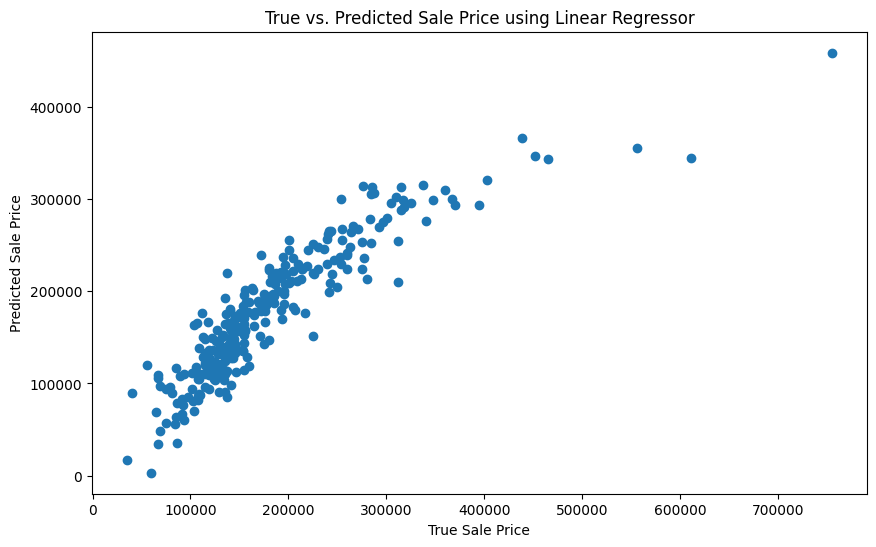

In [32]:
# Visualization of Predictions vs. True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("True vs. Predicted Sale Price using Linear Regressor")
plt.show()

### 2. Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
# Model Training
dt_regressor = DecisionTreeRegressor(max_depth=5)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Model Evaluation

In [35]:
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"Mean Squared Error (MSE) for Decision Tree Regressor: {mse:.2f}")
print(f"Mean Absolute Error (MAE) for Decision Tree Regressor: {mae:.2f}")
print(f"R-squared (R2) for Decision Tree Regressor: {r2:.2f}")

Mean Squared Error (MSE) for Decision Tree Regressor: 1431261374.34
Mean Absolute Error (MAE) for Decision Tree Regressor: 25760.93
R-squared (R2) for Decision Tree Regressor: 0.81


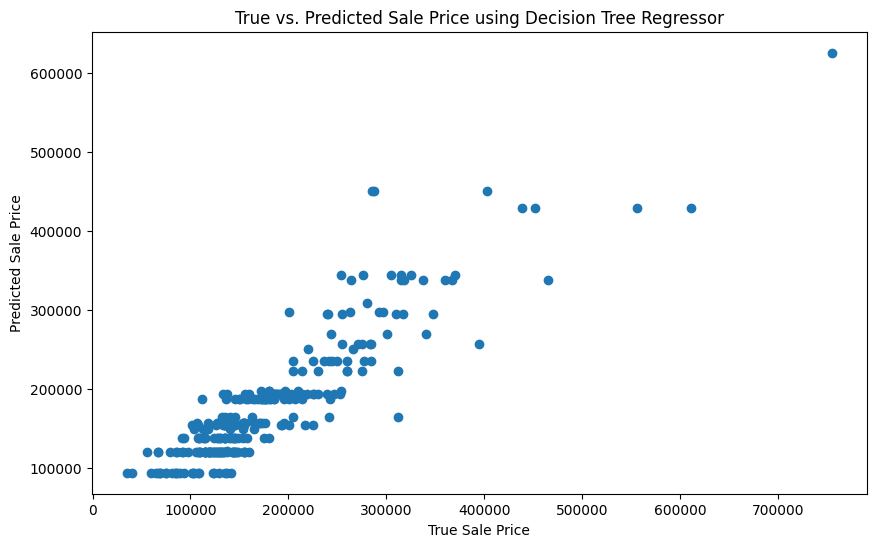

In [37]:
# Visualization of Predictions vs. True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("True vs. Predicted Sale Price using Decision Tree Regressor")
plt.show()

### 3. Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

In [40]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
print(f"Mean Squared Error (MSE) for Random Forest Regressor: {mse:.2f}")
print(f"Mean Absolute Error (MAE) for Random Forest Regressor: {mae:.2f}")
print(f"R-squared (R2) for Random Forest Regressor: {r2:.2f}")

Mean Squared Error (MSE) for Random Forest Regressor: 837355005.62
Mean Absolute Error (MAE) for Random Forest Regressor: 19243.63
R-squared (R2) for Random Forest Regressor: 0.89


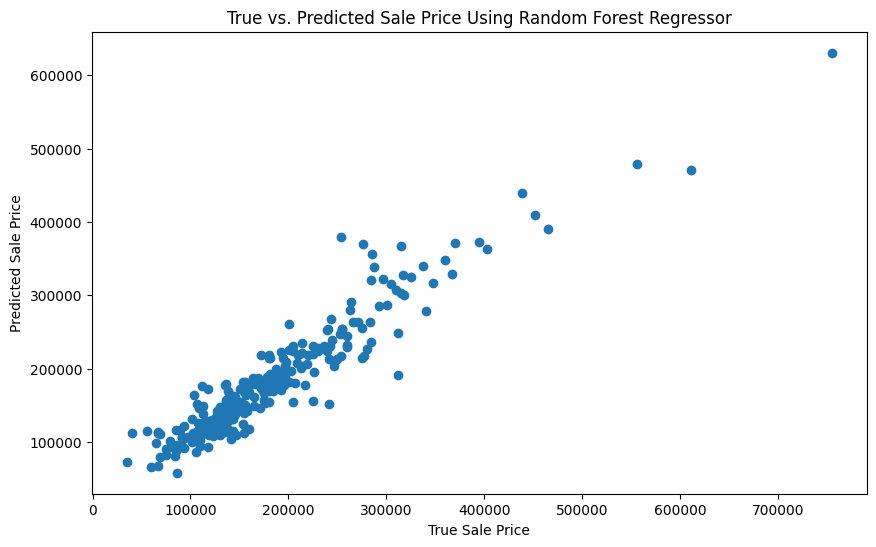

In [42]:
# Visualization of Predictions vs. True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("True vs. Predicted Sale Price Using Random Forest Regressor")
plt.show()

### 4. K-Nearest Neighbors (KNN) Regressor:

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
# Create a KNeighborsRegressor instance
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K)

# Fit the model to your training data
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

### Model Evalutation

In [45]:
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print(f"Mean Squared Error (MSE) for K-Nearest Neighbors Regressor: {mse:.2f}")
print(f"Mean Absolute Error (MAE) for K-Nearest Neighbors Regressor: {mae:.2f}")
print(f"R-squared (R2) for K-Nearest Neighbors Regressor: {r2:.2f}")

Mean Squared Error (MSE) for K-Nearest Neighbors Regressor: 1174773067.98
Mean Absolute Error (MAE) for K-Nearest Neighbors Regressor: 20806.81
R-squared (R2) for K-Nearest Neighbors Regressor: 0.85


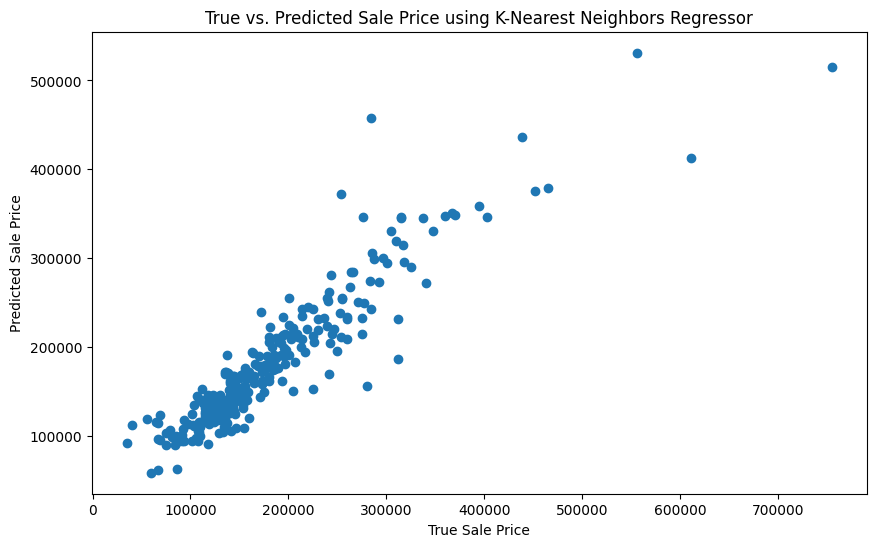

In [47]:
# Visualization of Predictions vs. True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("True vs. Predicted Sale Price using K-Nearest Neighbors Regressor")
plt.show()

### 5. Support Vector Regressor (SVR)

In [48]:
from sklearn.svm import SVR

In [49]:
# Create an SVR instance
svr_regressor = SVR(kernel='linear')  # You can choose different kernels, such as 'linear', 'rbf', 'poly', etc.

# Fit the model to your training data
svr_regressor.fit(X_train, y_train)

SVR(kernel='linear')

### Model Evaluation

In [50]:
y_pred = svr_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
print(f"Mean Squared Error (MSE) for Support Vector Regressor: {mse:.2f}")
print(f"Mean Absolute Error (MAE) for Support Vector Regressor: {mae:.2f}")
print(f"R-squared (R2) for Support Vector Regressor: {r2:.2f}")

Mean Squared Error (MSE) for Support Vector Regressor: 7403759985.56
Mean Absolute Error (MAE) for Support Vector Regressor: 57156.50
R-squared (R2) for Support Vector Regressor: 0.03


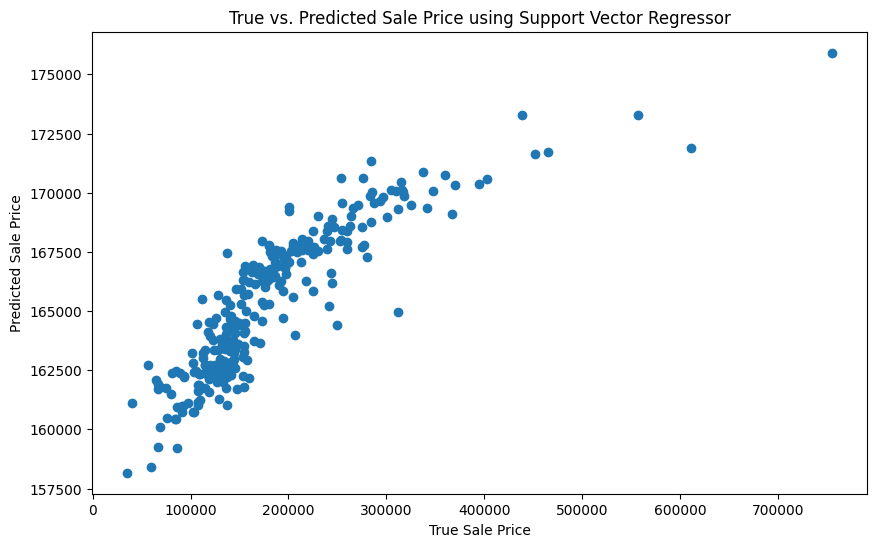

In [52]:
# Visualization of Predictions vs. True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("True vs. Predicted Sale Price using Support Vector Regressor")
plt.show()

# Summary
Based on these metrics, you can make the following observations:

- Random Forest Regressor has the lowest MSE and MAE, indicating the best predictive performance in terms of accuracy and error.
- Decision Tree Regressor also performs well with a relatively low MSE and MAE.
- Linear Regressor performs reasonably well but has a slightly higher MSE and MAE compared to Random Forest and Decision Tree.
- K-Nearest Neighbors Regressor performs decently with an MSE and MAE falling between Linear and Decision Tree models.
- Support Vector Regressor (SVR) has the highest MSE and MAE and the lowest R-squared, suggesting it may not be well-suited for your dataset.